In [1]:
import ROOT
import math
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/Users/dstocks/work/BoostedDM-gallery/srcs/MCParticleDistributionsTEST.root", "READ")

Welcome to JupyROOT 6.12/06


In [2]:
t = f.Get("MCParticles")
particles = ['Proton', 'Neutron', 'Pion', 'Pi0', 'Meson', 'Baryon']

# Angle Histograms
Generate data to display three separate histograms. The histograms we are interested in are as follows:

1) Angle between total final state momentum (vec) and DM momentum (vec).
    -- do this for a) include all particles
                   b) exclude neutrons
                   
2) Angle between leading particle momentum and DM momentum. --do this for both (a) and (b)

3) Angle between leading proton momentum and DM momentum.

In [3]:
total_P_ang = []
total_P_noneu_ang = []
lead_particle_P_ang = []
lead_particle_P_noneu_ang = []
lead_proton_P_ang = []

n_only_ev = 0
test2 = 0
test3 = 0

for i in t:
    
    # in this section, we fill total_p_ang, lead_particle_ang, total_p_noneu_ang, and lead_particle_noneu_ang
    # -----------------------------------------------------------
    total_P = 0
    total_Px = 0
    total_Py = 0
    total_Pz = 0
    
    total_P_noneu = 0
    total_Px_noneu = 0
    total_Py_noneu = 0
    total_Pz_noneu = 0
    
    lead_P = 0
    lead_Px = 0
    lead_Py = 0
    lead_Pz = 0
    
    lead_P_noneu = 0
    lead_Px_noneu = 0
    lead_Py_noneu = 0
    lead_Pz_noneu = 0
    
    
    for j in particles:
        
        Parg = "i.%sP" % j
        Pxarg = "i.%sPx" %j
        Pyarg = "i.%sPy" %j
        Pzarg = "i.%sPz" %j
        
        # everything within this if statement used to calculate "no neutron" statistics
        if (j != 'Neutron'):

            if len(eval(Parg)) > 0:

                for k in range(len(eval(Parg))):
                    if (eval(Parg)[k] > lead_P_noneu):
                        lead_P_noneu = eval(Parg)[k]
                        lead_Px_noneu = eval(Pxarg)[k]
                        lead_Py_noneu = eval(Pyarg)[k]
                        lead_Pz_noneu = eval(Pzarg)[k]
                
                    total_P_noneu += eval(Parg)[k]
                    total_Px_noneu += eval(Pxarg)[k]
                    total_Py_noneu += eval(Pyarg)[k]
                    total_Pz_noneu += eval(Pzarg)[k]
        
        # now we consider all particle types and find total momentum and leading particle momentum statistics
        if len(eval(Parg)) > 0:

                for k in range(len(eval(Parg))):
                    if (eval(Parg)[k] > lead_P):
                        lead_P = eval(Parg)[k]
                        lead_Px = eval(Pxarg)[k]
                        lead_Py = eval(Pyarg)[k]
                        lead_Pz = eval(Pzarg)[k]
                    
                    total_P += eval(Parg)[k]
                    total_Px += eval(Pxarg)[k]
                    total_Py += eval(Pyarg)[k]
                    total_Pz += eval(Pzarg)[k]
            
                    
    # check for events where only neutrons are present
    if (i.nProtons == 0 and i.nPions == 0 and i.nPi0s == 0 and i.nMesons == 0 and i.nBaryons == 0 and i.nNeutrons != 0):
        if (len(i.NeutronP) > 0):
            n_only_ev += 1
            
#             if (i.nParticles != i.nNeutrons + i.nProtons + i.nPions + i.nPi0s + i.nMesons + i.nBaryons):
#             print "EVENT SCAN"
#             print "Number of Genie: %d" % i.nGENIE
#             print "Number of Ar40: %d" % i.nAr40
#             print "Number of Ar39: %d" % i.nAr39
#             print "Number of Cl39: %d" % i.nCl39
#             print "Number of neutrons: %d" % i.nNeutrons
#             print "Number of protons: %d" % i.nProtons
#             print "Number of pions: %d" % i.nPions
#             print "Number of pi0s: %d" % i.nPi0s
#             print "Number of mesons: %d" % i.nMesons
#             print "Number of baryons: %d" % i.nBaryons
#             print "Total num of particles: %d" % i.nParticles
#             print "\n"
    
    # now check for events where other particles may be present with neutrons but they have 0 total momentum
   # if ( i.nNeutrons != 0 and ((len(i.BaryonP) == 0 and i.nBaryons != 0) or (len(i.MesonP) == 0 and i.nMesons != 0) or (len(i.Pi0P) == 0 and i.nPi0s != 0) or (len(i.PionP) == 0 and i.nPions != 0) or (len(i.ProtonP) == 0 and i.nProtons != 0)) ):
#         print "Number of protons is: %d" % i.nProtons
#         for j in range(i.nProtons):
#             print "Proton %d" % j
#             print "P: %f" % i.ProtonP[j]
#             print "E: %f\n" % i.ProtonE[j]
            
#         print "Number of pions is: %d" % i.nPions
#         for j in range(i.nPions):
#             print "Pion %d" % j
#             print "P: %f" % i.PionP[j]
#             print "E: %f\n" % i.PionE[j]
            
#         print "Number of pi0s is: %d" % i.nPi0s
#         for j in range(i.nPi0s):
#             print "Pi0 %d" % j
#             print "P: %f" % i.Pi0P[j]
#             print "E: %f\n" % i.Pi0E[j]
            
#         print "Number of mesons is: %d" % i.nMesons
#         for j in range(i.nMesons):
#             print "Meson %d" % j
#             print "P: %f" % i.MesonP[j]
#             print "E: %f\n" % i.MesonE[j]
            
#         print "Number of baryons is: %d" % i.nBaryons
#         for j in range(i.nBaryons):
#             print "Baryon %d" % j
#             print "P: %f" % i.BaryonP[j]
#             print "E: %f\n" % i.BaryonE[j]
#         print "\n"
#     if ( i.nNeutrons != 0 and i.nProtons == 0 and i.nPions == 0 and i.nPi0s == 0 and i.nMesons == 0 and i.nBaryons == 0 ):
#         if (len(i.NeutronP) > 0):
#             test2 += 1
    
    # test2 is number of events (all particles considered) that aren't counted because of zero leading momentum
    # test3 is number of events (excluding neutrons) that aren't counted because of zero leading momentum
    if (lead_P == 0):
        test2 += 1
    if (lead_P_noneu == 0):
        test3 += 1
        
    # calculate the relevant angles using the appropriate vectors and vector products
    if (lead_P > 0):            
        numerator1 = i.InDMPx[0] * lead_Px + i.InDMPy[0] * lead_Py + i.InDMPz[0] * lead_Pz
        denominator1 = i.InDMP[0] * lead_P
        lead_particle_P_ang.append(math.acos(numerator1/denominator1))
    
    if (total_P > 0):
        numerator2 = i.InDMPx[0] * total_Px + i.InDMPy[0] * total_Py + i.InDMPz[0] * total_Pz
        denominator2 = i.InDMP[0] * total_P
        total_P_ang.append(math.acos(numerator2/denominator2))
        
    if (lead_P_noneu > 0):
        numerator3 = i.InDMPx[0] * lead_Px_noneu + i.InDMPy[0] * lead_Py_noneu + i.InDMPz[0] * lead_Pz_noneu
        denominator3 = i.InDMP[0] * lead_P_noneu
        lead_particle_P_noneu_ang.append(math.acos(numerator3/denominator3))
        
    if (total_P_noneu > 0):
        numerator4 = i.InDMPx[0] * total_Px_noneu + i.InDMPy[0] * total_Py_noneu + i.InDMPz[0] * total_Pz_noneu
        denominator4 = i.InDMP[0] * total_P_noneu
        total_P_noneu_ang.append(math.acos(numerator4/denominator4))
        
    
    # now we fill lead_proton_ang
    # -----------------------------------------------------------
    if (i.nProtons > 0):
        lead_proton_P = 0
        lead_proton_Px = 0
        lead_proton_Py = 0
        lead_proton_Pz = 0
        for j in range(i.nProtons):
            if (i.ProtonP[j] > lead_proton_P):
                lead_proton_P = i.ProtonP[j]
                lead_proton_Px = i.ProtonPx[j]
                lead_proton_Py = i.ProtonPy[j]
                lead_proton_Pz = i.ProtonPz[j]

        if (lead_proton_P > 0):
            numerator5 = i.InDMPx[0] * lead_proton_Px + i.InDMPy[0] * lead_proton_Py + i.InDMPz[0] * lead_proton_Pz
            denominator5 = i.InDMP[0] * lead_proton_P
            lead_proton_P_ang.append(math.acos(numerator5/denominator5))

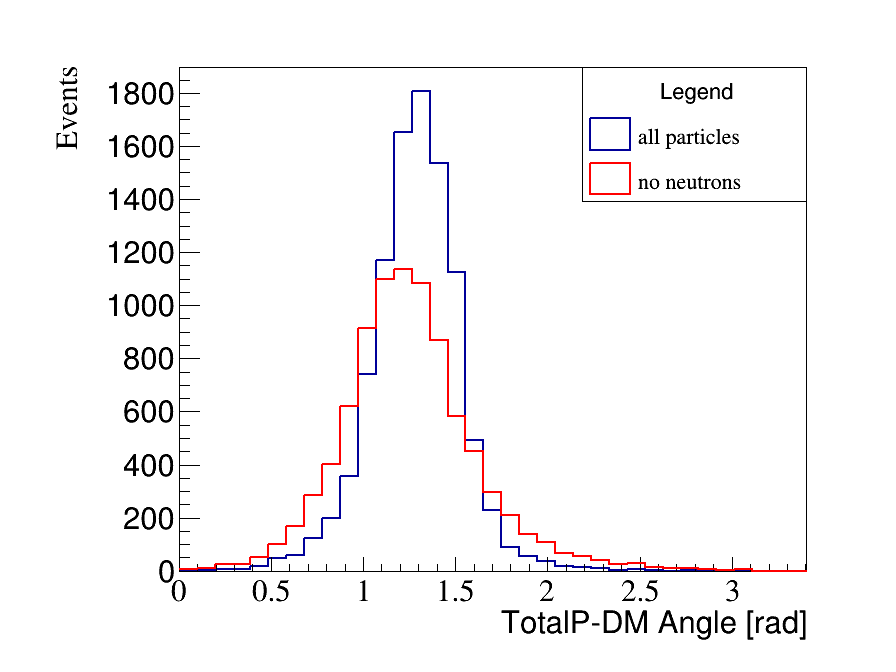

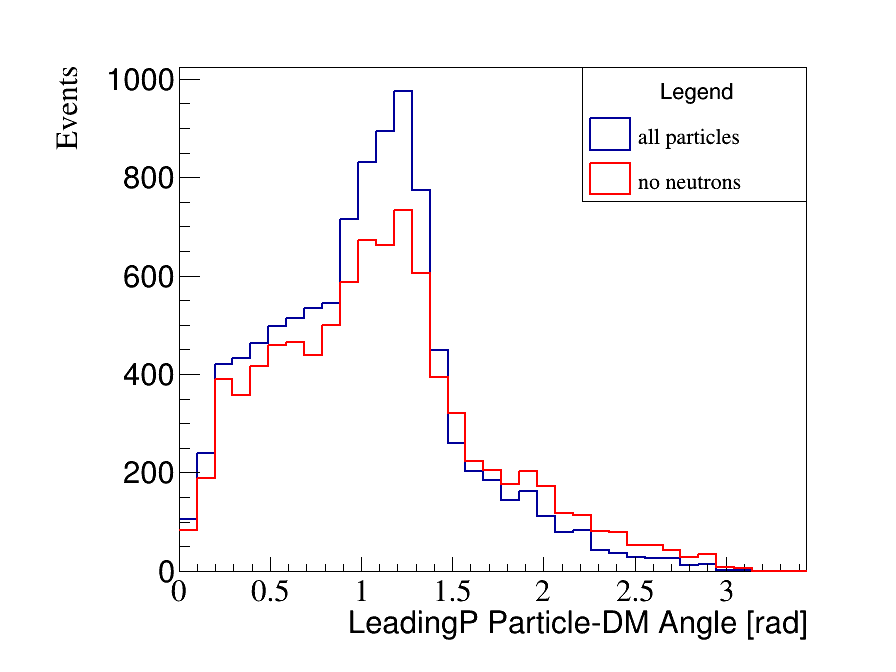

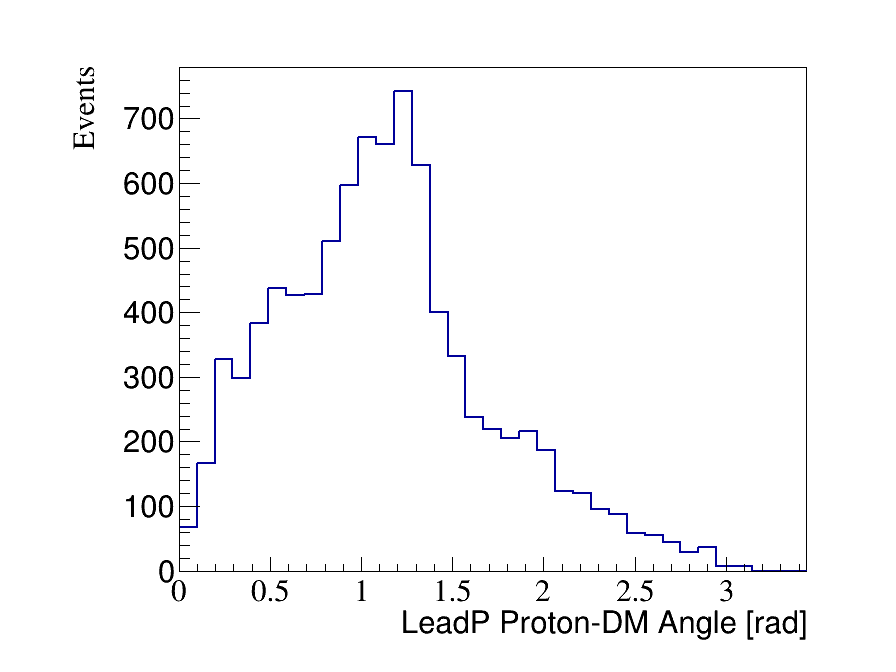

In [4]:
h_totalP_ang = ROOT.TH1F("totalP_ang", "", 35, 0, max(total_P_noneu_ang)*1.1)
c_totalP_ang = ROOT.TCanvas("totalP_ang", "TotalP Angle", 900, 700)
c_totalP_ang.SetBottomMargin(0.15)
c_totalP_ang.SetLeftMargin(0.2)

h_totalP_ang.GetXaxis().SetTitle("TotalP-DM Angle [rad]")
h_totalP_ang.GetYaxis().SetTitle("Events")
h_totalP_ang.SetLineWidth(2)
h_totalP_ang.GetXaxis().SetLabelFont(132)
h_totalP_ang.GetYaxis().SetTitleFont(132)

h_totalP_ang.GetXaxis().SetLabelSize(0.05)
h_totalP_ang.GetXaxis().SetTitleSize(0.05)
h_totalP_ang.GetYaxis().SetLabelSize(0.05)
h_totalP_ang.GetYaxis().SetTitleSize(0.05)

c_totalP_ang.Draw()
h_totalP_ang.Draw()


h_totalP_noneu_ang = ROOT.TH1F("totalP_noneu_ang", "", 35, 0, max(total_P_noneu_ang)*1.1)
h_totalP_noneu_ang.SetLineWidth(2)
h_totalP_noneu_ang.SetLineColor(2)
h_totalP_noneu_ang.GetXaxis().SetLabelFont(132)
h_totalP_noneu_ang.GetYaxis().SetTitleFont(132)

h_totalP_noneu_ang.GetXaxis().SetLabelSize(0.05)
h_totalP_noneu_ang.GetXaxis().SetTitleSize(0.05)
h_totalP_noneu_ang.GetYaxis().SetLabelSize(0.05)
h_totalP_noneu_ang.GetYaxis().SetTitleSize(0.05)

h_totalP_noneu_ang.Draw("SAME")


legend1 = ROOT.TLegend(0.9, 0.7, 0.65, 0.9)
legend1.SetHeader("Legend", "C")
legend1.AddEntry(h_totalP_ang, "all particles", "f")
legend1.AddEntry(h_totalP_noneu_ang, "no neutrons", "f")
legend1.Draw()
legend1.SetTextSize(0.035)
legend1.SetTextFont(132)

# -------------------------------------------------------------------------------------

h_leadP_ang = ROOT.TH1F("leadP_particle_ang", "", 35, 0, max(lead_particle_P_noneu_ang)*1.1)
c_leadP_ang = ROOT.TCanvas("leadP_particle_ang", "LeadingP Particle Angle", 900, 700)
c_leadP_ang.SetBottomMargin(0.15)
c_leadP_ang.SetLeftMargin(0.2)

h_leadP_ang.GetXaxis().SetTitle("LeadingP Particle-DM Angle [rad]")
h_leadP_ang.GetYaxis().SetTitle("Events")
h_leadP_ang.SetLineWidth(2)
h_leadP_ang.GetXaxis().SetLabelFont(132)
h_leadP_ang.GetYaxis().SetTitleFont(132)

h_leadP_ang.GetXaxis().SetLabelSize(0.05)
h_leadP_ang.GetXaxis().SetTitleSize(0.05)
h_leadP_ang.GetYaxis().SetLabelSize(0.05)
h_leadP_ang.GetYaxis().SetTitleSize(0.05)

c_leadP_ang.Draw()
h_leadP_ang.Draw()


h_leadP_noneu_ang = ROOT.TH1F("leadP_particle_noneu_ang", "", 35, 0, max(lead_particle_P_noneu_ang)*1.1)
h_leadP_noneu_ang.SetLineWidth(2)
h_leadP_noneu_ang.SetLineColor(2)
h_leadP_noneu_ang.GetXaxis().SetLabelFont(132)
h_leadP_noneu_ang.GetYaxis().SetTitleFont(132)

h_leadP_noneu_ang.GetXaxis().SetLabelSize(0.05)
h_leadP_noneu_ang.GetXaxis().SetTitleSize(0.05)
h_leadP_noneu_ang.GetYaxis().SetLabelSize(0.05)
h_leadP_noneu_ang.GetYaxis().SetTitleSize(0.05)

h_leadP_noneu_ang.Draw("SAME")


legend2 = ROOT.TLegend(0.9, 0.7, 0.65, 0.9)
legend2.SetHeader("Legend", "C")
legend2.AddEntry(h_leadP_ang, "all particles", "f")
legend2.AddEntry(h_leadP_noneu_ang, "no neutrons", "f")
legend2.Draw()
legend2.SetTextSize(0.035)
legend2.SetTextFont(132)

# -------------------------------------------------------------------------------------

h_leadP_proton_ang = ROOT.TH1F("leadP_proton_ang", "", 35, 0, max(lead_proton_P_ang)*1.1)
c_leadP_proton_ang = ROOT.TCanvas("leadP_proton_ang", "LeadP Proton Angle", 900, 700)
c_leadP_proton_ang.SetBottomMargin(0.15)
c_leadP_proton_ang.SetLeftMargin(0.2)

h_leadP_proton_ang.GetXaxis().SetTitle("LeadP Proton-DM Angle [rad]")
h_leadP_proton_ang.GetYaxis().SetTitle("Events")
h_leadP_proton_ang.SetLineWidth(2)
h_leadP_proton_ang.GetXaxis().SetLabelFont(132)
h_leadP_proton_ang.GetYaxis().SetTitleFont(132)

h_leadP_proton_ang.GetXaxis().SetLabelSize(0.05)
h_leadP_proton_ang.GetXaxis().SetTitleSize(0.05)
h_leadP_proton_ang.GetYaxis().SetLabelSize(0.05)
h_leadP_proton_ang.GetYaxis().SetTitleSize(0.05)

c_leadP_proton_ang.Draw()
h_leadP_proton_ang.Draw()

# -------------------------------------------------------------------------------------

# now fill the histograms

for i in total_P_ang:
    h_totalP_ang.Fill(i)
    
for i in total_P_noneu_ang:
    h_totalP_noneu_ang.Fill(i)
    
for i in lead_particle_P_ang:
    h_leadP_ang.Fill(i)

for i in lead_particle_P_noneu_ang:
    h_leadP_noneu_ang.Fill(i)

for i in lead_proton_P_ang:
    h_leadP_proton_ang.Fill(i)

In [5]:
diff1 = len(lead_particle_P_ang) - len(lead_particle_P_noneu_ang)
diff2 = len(total_P_ang) - len(total_P_noneu_ang)
print diff1
print diff2

949
949


In [6]:
print n_only_ev

744


In [7]:
print (test3 - test2)

949


In [8]:
c_totalP_ang.Print('Angle_Data.pdf(')
c_leadP_ang.Print('Angle_Data.pdf')
c_leadP_proton_ang.SaveAs('Angle_Data.pdf)')

Info in <TCanvas::Print>: pdf file Angle_Data.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file Angle_Data.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Angle_Data.pdf and file closed
